### Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import contractions 
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

### Import data file

In [2]:
data = pd.read_excel('Womens Clothing Reviews Data.xlsx')

#### Data preprocessing

In [3]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [5]:
data.shape

(23486, 11)

In [6]:
data.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362
std,203.298980,12.279544,1.110031,0.382216
min,0.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


In [7]:
data.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [8]:
# Handling missing values 
data.dropna(inplace=True)

In [9]:
data.shape

(19662, 11)

In [10]:
data['Review Text'].values[:5]

array(['I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
       'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!',
       'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dres

In [11]:
data['Review Title'].value_counts()

Review Title
Love it!                           136
Beautiful                           95
Love                                88
Love!                               83
Beautiful!                          72
                                  ... 
Flattering, vintage feel             1
Very straight                        1
Not for my body                      1
Perfect transition dress             1
Please make more like this one!      1
Name: count, Length: 13983, dtype: int64

In [12]:
# Create Positive/Negative sentiment flag based on rating
data['Sentiment'] = np.where(data['Rating'] >= 4, 'Positive', 'Negative')

# Convert categorical variables to category type
categorical_cols = ['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel', 'Review Title', 'Review Text']
data[categorical_cols] = data[categorical_cols].astype('category')
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Sentiment
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Negative
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Positive
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,Negative
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,Positive


In [13]:
data.shape

(19662, 12)

In [14]:
data['Sentiment'].value_counts()

Sentiment
Positive    15147
Negative     4515
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

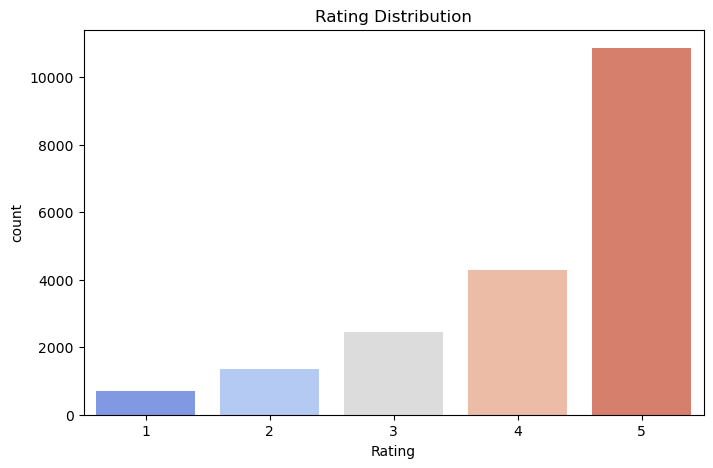

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


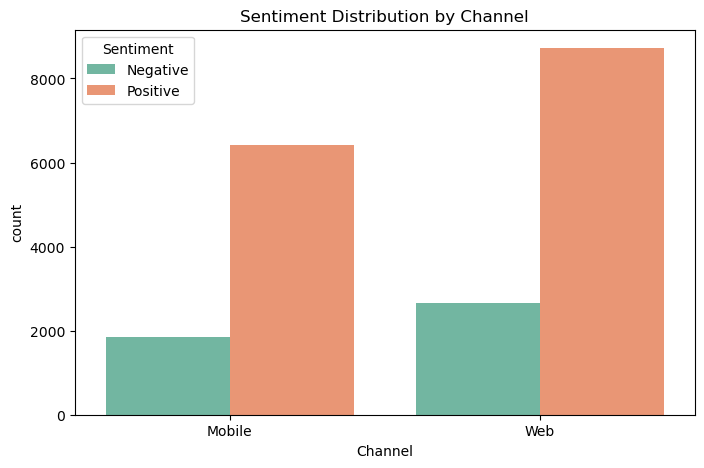

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


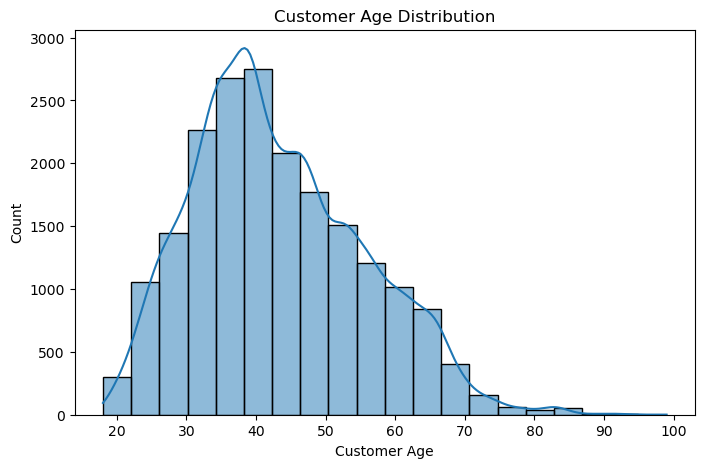

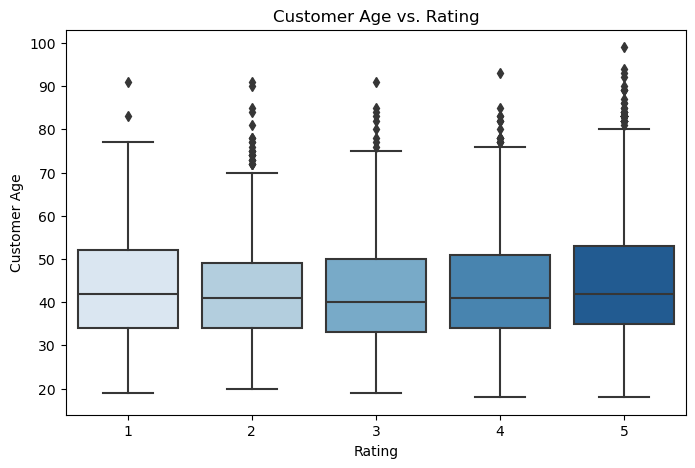

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Rating', palette='coolwarm')
plt.title('Rating Distribution')
plt.show()

# Barplot: Sentiment distribution by Channel
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Channel', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution by Channel')
plt.show()

# Histogram: Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Customer Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()

# Boxplot: Age vs. Rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Rating', y='Customer Age', palette='Blues')
plt.title('Customer Age vs. Rating')
plt.show()


### Word Clouds for Sentiment Analysis

In [16]:
data = data[data['Sentiment'].isin(['Positive','Negative'])]

### Sentiment Analysis by Segment

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


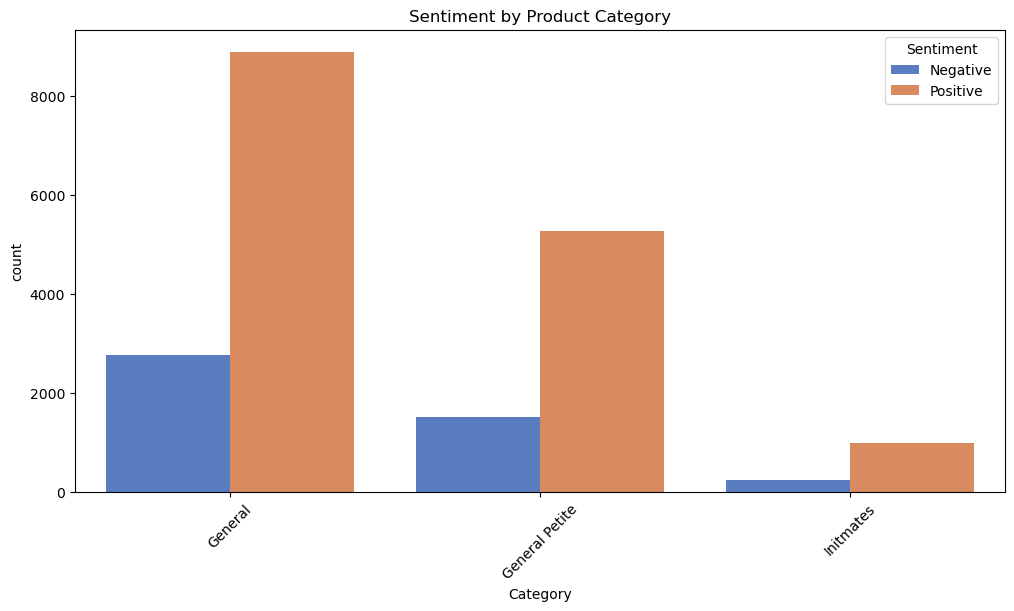

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


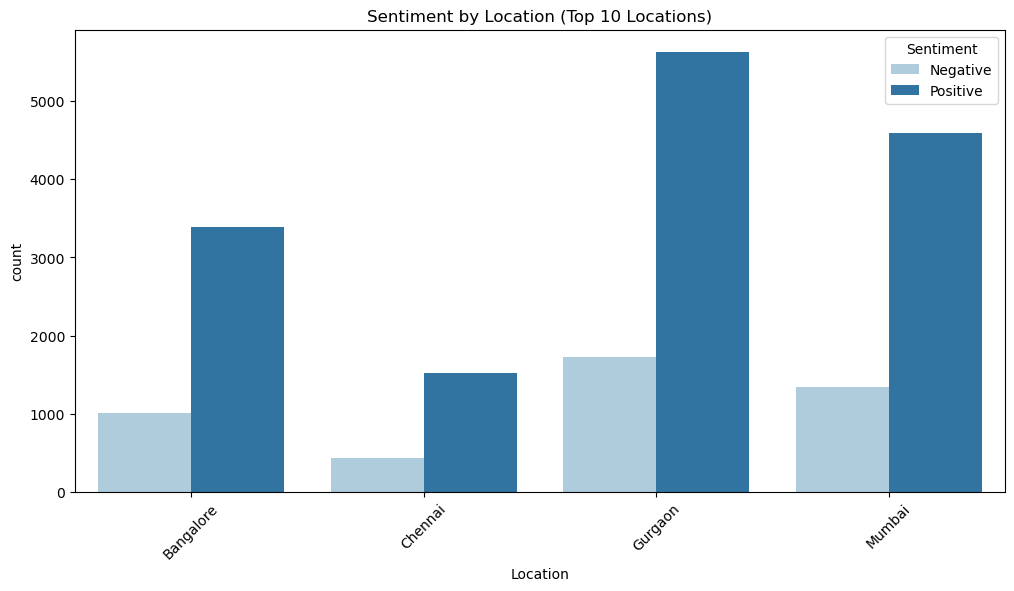

In [17]:
# Sentiment distribution by Category and Subcategory
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', hue='Sentiment', palette='muted')
plt.title('Sentiment by Product Category')
plt.xticks(rotation=45)
plt.show()

# Sentiment by Location
top_locations = data['Location'].value_counts().head(10).index
location_sentiment = data[data['Location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=location_sentiment, x='Location', hue='Sentiment', palette='Paired')
plt.title('Sentiment by Location (Top 10 Locations)')
plt.xticks(rotation=45)
plt.show()


In [18]:
data.head(1)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Sentiment
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Negative


In [19]:
data.reset_index(drop=True,inplace=True)

In [20]:
data.head(1)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Sentiment
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Negative


In [21]:
data.shape

(19662, 12)

In [22]:
def convert_lower(text):
    text = text.lower()
    return text

def expand_contractions(text):
    text = contractions.fix(text)
    return text

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]','',text)
    text = re.sub(r'\s+',' ',text)
    return text 

def stemming(text):
    l = text.split(' ')
    text = [ps.stem(w) for w in l]
    return ' '.join(text)

def lemmatization(text):
    text = [ls.lemmatize(w) for w in text.split(' ')]
    return ' '.join(text)

def stopword_removal(text):
    text = [w for w in text.split(' ') if w not in stopwords_l]
    return ' '.join(text)

def remove_mentions(text):
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'[...]',' ',text)
    text = re.sub(r'&amp','',text)
    
    return text

In [23]:
def clean_text(text):
    text = convert_lower(text)
    
    text = expand_contractions(text)
    
    text = remove_mentions(text)
    
    text = remove_special_characters(text)
    
#     text = stemming(text)
    
    text = stopword_removal(text)
    
    text = lemmatization(text)
    
    text = text.strip()
    
    return text

In [24]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
ls = WordNetLemmatizer()
stopwords_l = nltk.corpus.stopwords.words('english')

In [25]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import contractions

In [27]:
corpus = data['Review Text'].values[:10]

In [28]:
cleaned_corpus =[]
for doc in corpus:
    cleaned_corpus.append(clean_text(doc))

In [29]:
corpus

['I had such high hopes for this dress and real..., 'I love, love, love this jumpsuit. it's fun, f..., 'This shirt is very flattering to all due to t..., 'I love tracy reese dresses, but this one is n..., 'I aded this in my basket at hte last mintue t..., 'I ordered this in carbon for store pick up, a..., 'I love this dress. i usually get an xs but it..., 'I'm 5"5' and 125 lbs. i ordered the s petite ..., 'Dress runs small esp where the zipper area ru..., 'More and more i find myself reliant on the re...]
Categories (19656, object): ['"does this sweater make my hips look big?" my..., '"vegan suede" makes these sound fancier than ..., '$78 for a pair of sweats seems like a lot of ..., '- this really is lovely. the overall design f..., ..., 'You won't break the bank with this cute tee. ..., 'You would expect anything woolen to be slight..., 'You've probably read through the other review..., 'Yummy, soft material, but very faded looking....]

In [30]:
cleaned_corpus

['high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer going major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt',
 'love tracy reese dress one petite foot tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress',
 'aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer petite dec

In [31]:
data['clean_text'] = data['Review Text'].apply(lambda x:clean_text(x))

In [32]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Sentiment,clean_text
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Negative,high hope dress really wanted work initially o...
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Positive,love love love jumpsuit fun flirty fabulous ev...
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Positive,shirt flattering due adjustable front tie perf...
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,Negative,love tracy reese dress one petite foot tall us...
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,Positive,aded basket hte last mintue see would look lik...


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product ID      19662 non-null  int64   
 1   Category        19662 non-null  category
 2   Subcategory1    19662 non-null  category
 3   SubCategory2    19662 non-null  category
 4   Location        19662 non-null  category
 5   Channel         19662 non-null  category
 6   Customer Age    19662 non-null  int64   
 7   Review Title    19662 non-null  category
 8   Review Text     19662 non-null  category
 9   Rating          19662 non-null  int64   
 10  Recommend Flag  19662 non-null  int64   
 11  Sentiment       19662 non-null  object  
 12  clean_text      19662 non-null  object  
dtypes: category(7), int64(4), object(2)
memory usage: 2.3+ MB


In [34]:
data.isnull().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
Sentiment         0
clean_text        0
dtype: int64

In [35]:
data[data['clean_text']=='']

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Sentiment,clean_text


In [36]:
data = data[data['clean_text']!='']
data.reset_index(drop=True,inplace=True)

In [37]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Sentiment,clean_text
0,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Negative,high hope dress really wanted work initially o...
1,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Positive,love love love jumpsuit fun flirty fabulous ev...
2,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Positive,shirt flattering due adjustable front tie perf...
3,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,Negative,love tracy reese dress one petite foot tall us...
4,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,Positive,aded basket hte last mintue see would look lik...


In [38]:
data.shape

(19662, 13)

In [39]:
data.to_csv('sentiment_clean_data.csv',index=False)

### Topic Modeling with LDA

In [40]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert review text into a document-term matrix
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_dtm = vectorizer.fit_transform(data['Review Text'])

# LDA Model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_dtm)

# Display topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: ", [terms[i] for i in topic.argsort()[-10:]])


Topic 1:  ['just', 'medium', 'large', 'like', 'petite', 'xs', 'ordered', 'fit', 'small', 'size']
Topic 2:  ['fabric', 'comfortable', 'flattering', 'just', 'like', 'great', 'perfect', 'wear', 'love', 'dress']
Topic 3:  ['perfect', 'fit', 'soft', 'pants', 'sweater', 'color', 'wear', 'jeans', 'great', 'love']
Topic 4:  ['fit', 'little', 'small', 'cute', 'wear', 'love', 'fabric', 'like', 'shirt', 'size']
Topic 5:  ['love', 'just', 'size', 'waist', 'like', 'fit', 'fabric', 'look', '_x000d_', 'dress']


## Word Embeddings¶

In [41]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [42]:
cnt = CountVectorizer(min_df=2)
tfidf = TfidfVectorizer(min_df=2)


In [43]:
corpus = data['clean_text'].values

In [44]:
corpus[:4]

array(['high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer going major design flaw net layer sewn directly zipper c',
       'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
       'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt',
       'love tracy reese dress one petite foot tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress'],
      dtype=object)

In [45]:
cnt_df = cnt.fit_transform(corpus)
tfidf_df = tfidf.fit_transform(corpus)

In [46]:
count_df = pd.DataFrame(cnt_df.toarray(),columns=sorted(cnt.vocabulary_.keys()))
count_df.head()

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
tf_df = pd.DataFrame(tfidf_df.toarray(),columns=sorted(tfidf.vocabulary_.keys()))
tf_df.head()

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.145053,0.0,0.125917,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


## Split Data into Train and Test Set¶

In [48]:
data.shape, count_df.shape, tf_df.shape

((19662, 13), (19662, 7197), (19662, 7197))

In [49]:
count_df['Sentiment'] = data['Sentiment']
tf_df['Sentiment'] = data['Sentiment']
count_df.head()

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [50]:
tf_df.head(3)

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.145053,0.0,0.125917,0.0,0.0,0.0,0.0,Negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Positive


In [51]:
label_mapping ={'Negative':0,'Positive':1}

In [52]:
count_df['Sentiment']  = count_df['Sentiment'].apply(lambda x:label_mapping[x])
tf_df['Sentiment']  = tf_df['Sentiment'].apply(lambda x:label_mapping[x])

In [53]:
tf_df.head(3)

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.145053,0.0,0.125917,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [54]:
count_df.head(3)

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
Count_X = count_df.iloc[:,:-1]
Count_Y = count_df['Sentiment']

Tf_X = tf_df.iloc[:,:-1]
Tf_Y = tf_df['Sentiment']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(Count_X,Count_Y,test_size=0.20,stratify=Count_Y,random_state=45)
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(Tf_X,Tf_Y,test_size=0.20,stratify=Tf_Y,random_state=45)

In [58]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((15729, 7197), (3933, 7197), (15729,), (3933,))

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr_cnt= LogisticRegression()
lr_tfidf = LogisticRegression()

In [61]:
lr_cnt.fit(xtrain,ytrain)
lr_tfidf.fit(xtrain1,ytrain1)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
pred_cnt = lr_cnt.predict(xtest)
pred_tf = lr_tfidf.predict(xtest1)

In [63]:
from sklearn.metrics import classification_report,accuracy_score

In [64]:
## Count Vectorizer
acc_score = accuracy_score(ytest,pred_cnt)
acc_score

0.8749046529366895

In [65]:
print(classification_report(ytest,pred_cnt))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       903
           1       0.90      0.94      0.92      3030

    accuracy                           0.87      3933
   macro avg       0.83      0.80      0.82      3933
weighted avg       0.87      0.87      0.87      3933



In [66]:
## Tf IDF Vectorizer
acc_score1 = accuracy_score(ytest1,pred_tf)
acc_score1

0.8759216882786677

In [67]:
print(classification_report(ytest1,pred_tf))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       903
           1       0.89      0.96      0.92      3030

    accuracy                           0.88      3933
   macro avg       0.85      0.78      0.81      3933
weighted avg       0.87      0.88      0.87      3933

